In [418]:
import praw
import pandas as pd
import datetime as dt
from psaw import PushshiftAPI
import seaborn as sns
import matplotlib.pyplot as plt

In [419]:
reddit = praw.Reddit(client_id='XkgWRt6rMkwKjQ', \
                     client_secret='503fhvni4TqnPXYH6iQU-z9AgJw', \
                     user_agent='Abhi_Portfolio', \
                     username='012340', \
                     password='Singerr*889900')

In [420]:
start_epoch=int(dt.datetime(2019, 1, 26,0,0,0).timestamp())
end_epoch=int(dt.datetime(2019, 1, 26,23,59,59).timestamp())
start_epoch
end_epoch


1548500399

In [257]:
subreddit = reddit.subreddit('Askreddit')
api = PushshiftAPI(reddit
                  )

In [424]:
#We want to find the subreddit with the highest submissions per hour
submissions=api.search_submissions(after=start_epoch, before=end_epoch,subreddit = ['askreddit','politics','worldnews','funny','pics'])

submissions

<generator object PushshiftAPI._praw_search at 0x000001FF35BB1CF0>

In [425]:
topics_dict = { "title":[], 
                "score":[], 
             "sub_id":[],
               "gold":[],
                "comms_num": [], 
                "created": []
                }
count = 0;

In [426]:
for submission in submissions:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["sub_id"].append(submission.subreddit)
    topics_dict["gold"].append(submission.gilded)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    count = count+1
    
count

18337

In [427]:
topics_data = pd.DataFrame(topics_dict)
topics_data


,title,score,sub_id,gold,comms_num,created
0,Germany to phase out coal by 2038 in move away...,33,worldnews,0,6,1.548529e+09
1,Baby Swans,17,pics,0,1,1.548529e+09
2,چشمه های آب گرم در ژاپن,1,worldnews,0,0,1.548529e+09
3,"If every mythological creature became real, wh...",8,AskReddit,0,17,1.548529e+09
4,Timing is everything,14,funny,0,3,1.548529e+09
5,Ethics complaint against Andrew Gillum will pr...,14,politics,0,14,1.548529e+09
6,[Serious] Why did Disney give up on Power rang...,3,AskReddit,0,3,1.548529e+09
7,Funniest shit today😂😂😂😂😂,1,funny,0,1,1.548529e+09
8,What's your best reason for not wanting fame?,3,AskReddit,0,20,1.548529e+09
9,I came to a conclusion. Last year in January w...,1,funny,0,0,1.548529e+09


In [428]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
temp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = temp)

In [298]:
path = "C:\\Users\\Abhishek\\Desktop\\PlaySimple\\aa.csv"
topics_data.to_csv(path,index= "utf-8")

In [429]:
day = topics_data['timestamp'].dt.day
hour = topics_data['timestamp'].dt.hour
topics_data = topics_data.assign(day = day)
topics_data = topics_data.assign(hour = hour)
topics_data

,title,score,sub_id,gold,comms_num,created,timestamp,day,hour
0,Germany to phase out coal by 2038 in move away...,33,worldnews,0,6,1.548529e+09,2019-01-27 07:59:58,27,7
1,Baby Swans,17,pics,0,1,1.548529e+09,2019-01-27 07:59:30,27,7
2,چشمه های آب گرم در ژاپن,1,worldnews,0,0,1.548529e+09,2019-01-27 07:59:20,27,7
3,"If every mythological creature became real, wh...",8,AskReddit,0,17,1.548529e+09,2019-01-27 07:59:18,27,7
4,Timing is everything,14,funny,0,3,1.548529e+09,2019-01-27 07:59:14,27,7
5,Ethics complaint against Andrew Gillum will pr...,14,politics,0,14,1.548529e+09,2019-01-27 07:59:07,27,7
6,[Serious] Why did Disney give up on Power rang...,3,AskReddit,0,3,1.548529e+09,2019-01-27 07:59:07,27,7
7,Funniest shit today😂😂😂😂😂,1,funny,0,1,1.548529e+09,2019-01-27 07:59:07,27,7
8,What's your best reason for not wanting fame?,3,AskReddit,0,20,1.548529e+09,2019-01-27 07:59:00,27,7
9,I came to a conclusion. Last year in January w...,1,funny,0,0,1.548529e+09,2019-01-27 07:58:56,27,7


In [431]:
print(topics_data.dtypes)
sub_id_new = topics_data['sub_id'].astype('category')
topics_data = topics_data.assign(sub_id_new = sub_id_new)


title                object
score                 int64
sub_id               object
gold                  int64
comms_num             int64
created             float64
timestamp    datetime64[ns]
day                   int64
hour                  int64
dtype: object


In [433]:
top = pd.DataFrame(topics_data.groupby(['day','hour','sub_id_new'],as_index=False).size().reset_index(name ='Total'))
top = pd.DataFrame(top)
top['Time'] = top['day'].astype(str) + "_" + top['hour'].astype(str)
top.dtypes
top

,day,hour,sub_id_new,Total,Time
0,26,8,worldnews,65,26_8
1,26,8,pics,34,26_8
2,26,8,AskReddit,321,26_8
3,26,8,funny,101,26_8
4,26,8,politics,149,26_8
5,26,9,worldnews,49,26_9
6,26,9,pics,59,26_9
7,26,9,AskReddit,385,26_9
8,26,9,funny,114,26_9
9,26,9,politics,50,26_9


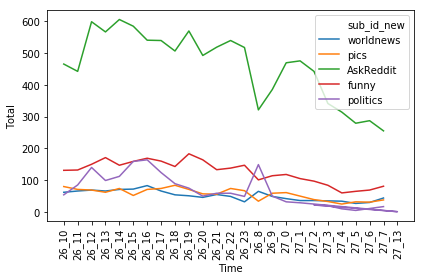

In [434]:
plot_data = top.iloc[:,[4,3,2]]

#plot_data.plot(x='Time', y = 'Total',columns = 'sub_id_new')


ax = sns.lineplot(data=plot_data, x='Time', y = 'Total',hue = 'sub_id_new')
plt.xticks(plt.xticks()[0],  rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#We see clearly that Ask Reddit has the highest submissions per hour